## import Necessary libraries…

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

# importing DataSet

In [2]:
df = pd.read_csv(r"C:\Users\BOT-PC\Desktop\minute_weather.csv")

In [3]:
df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
sample_df = df[(df['rowID'] % 10) == 0]
sample_df.shape

(158726, 13)

In [6]:
df1 = sample_df.drop(columns =['rain_accumulation','rain_duration'])
print(df1.columns)

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')



# Seleting columns we are interested in clustering

In [7]:
cols_of_interest = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed','max_wind_direction',
                    'max_wind_speed', 'relative_humidity']

In [8]:
newData = df1[cols_of_interest]
newData.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


# checking for isNull rows

In [9]:
newData[newData.isna().any(axis=1)]

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
34790,915.7,51.08,NaN,NaN,NaN,NaN,91.0
36320,914.7,50.00,NaN,NaN,NaN,NaN,91.9
36330,914.4,50.18,NaN,NaN,NaN,NaN,92.0
79100,911.1,48.92,NaN,NaN,NaN,NaN,91.4
79250,910.6,48.02,NaN,NaN,NaN,NaN,91.8
82770,914.7,44.42,NaN,NaN,NaN,NaN,91.9
136190,916.4,41.18,NaN,NaN,NaN,NaN,92.6
136210,916.6,41.36,NaN,NaN,NaN,NaN,92.5
191880,917.3,48.56,NaN,NaN,NaN,NaN,90.5
192170,917.5,46.04,NaN,NaN,NaN,NaN,91.3


In [10]:
df2= newData.dropna()

In [11]:
df2.isnull().any().sum().sum()

0

In [12]:
X = StandardScaler().fit_transform(df2)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

# Implement K-means algorithm using sci-kit

In [13]:
#Set number of clusters at initialisation time
k_means = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means.fit(X)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means.predict(X)


# CH score

In [15]:
metrics.calinski_harabasz_score(X, labels)

36554.95657975562

# Lets take n_clusters = 8

In [16]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X)
y_hat_8 = k_means_8.predict(X)

# CV Score

In [18]:
metrics.calinski_harabasz_score(X, labels_8)


41105.01527645836

# Elbow Plot

In [19]:
#for each value of k, we can initialise k_means and use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)
    

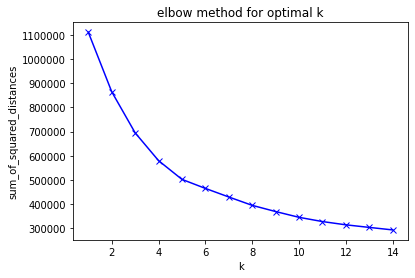

In [20]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

# K = 5

In [22]:
k_means_5 = KMeans(n_clusters=5)
model = k_means.fit(X)
y_hat = k_means.predict(X)

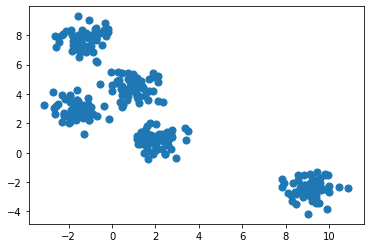

In [24]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Hierarchical Clustering

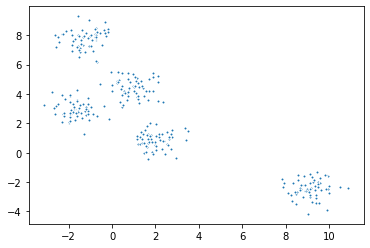

In [25]:
# Agglomerative Clustering-
#n_clusters is number of clusters to form and number of centroids to generate
#linkage sets which distance to use between sets of observations

X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='white')
plt.show()

In [43]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='average')
# Fit the model with X and y from generated data
agglom.fit(X, y_true)
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(8, 5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [44]:
# Scale the data points down or else the data points will be scattered very far apart.
# Create a minimum and maximum range of X.
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

# Get the average distance for X.

In [45]:
X = (X - x_min) / (x_max - x_min)

# Display all of the datapoints

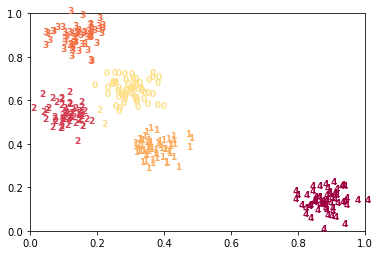

In [46]:
for i in range(X.shape[0]):
    # Replace the data points with their respective cluster value
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X[i, 0], X[i, 1], str(y_true[i]),
             color=plt.get_cmap('Spectral')(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

In [47]:
# Dendrogram Associated for the Agglomerative Hierarchical Clustering
# Distance Matrix or Proximity Matrix of points
print("X is: \n",X[:5])
print('\n Y is: \n', y_true[:5])

X is: 
 [[0.93166797 0.19391015]
 [0.18206207 0.91445545]
 [0.26274405 0.62289796]
 [0.82684501 0.10197615]
 [0.13499571 0.52129044]]

 Y is: 
 [4 3 0 4 2]


In [48]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X[0:], X[1:])
print('Distance Matrix: \n', dist_matrix)

Distance Matrix: 
 [[1.03975697 0.79466329 0.13942637 ... 0.88914193 0.5282246  0.76397567]
 [0.         0.30251505 1.0372404  ... 0.36757964 0.55452445 0.34899864]
 [0.30251505 0.         0.76783423 ... 0.16092238 0.27337724 0.0466883 ]
 ...
 [0.36757964 0.16092238 0.8398639  ... 0.         0.3633008  0.15450839]
 [0.55452445 0.27337724 0.49447044 ... 0.3633008  0.         0.23782466]
 [0.34899864 0.0466883  0.73138654 ... 0.15450839 0.23782466 0.        ]]


# Choose any linkage criterion

In [53]:

from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

# Plot the dendrogram

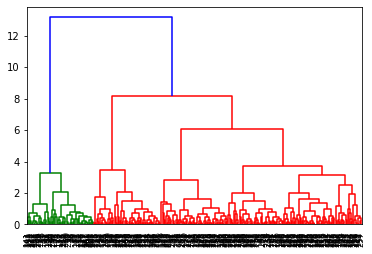

In [52]:
dendrogram = hierarchy.dendrogram(Z,
                                  leaf_rotation=90.,
                                  leaf_font_size=8
                                  )
plt.show()